In [16]:
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10,6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

# importamos la base de datos
df = pd.read_csv('qog_std_cs_jan18.csv')

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <a list of 10 Patch objects>)

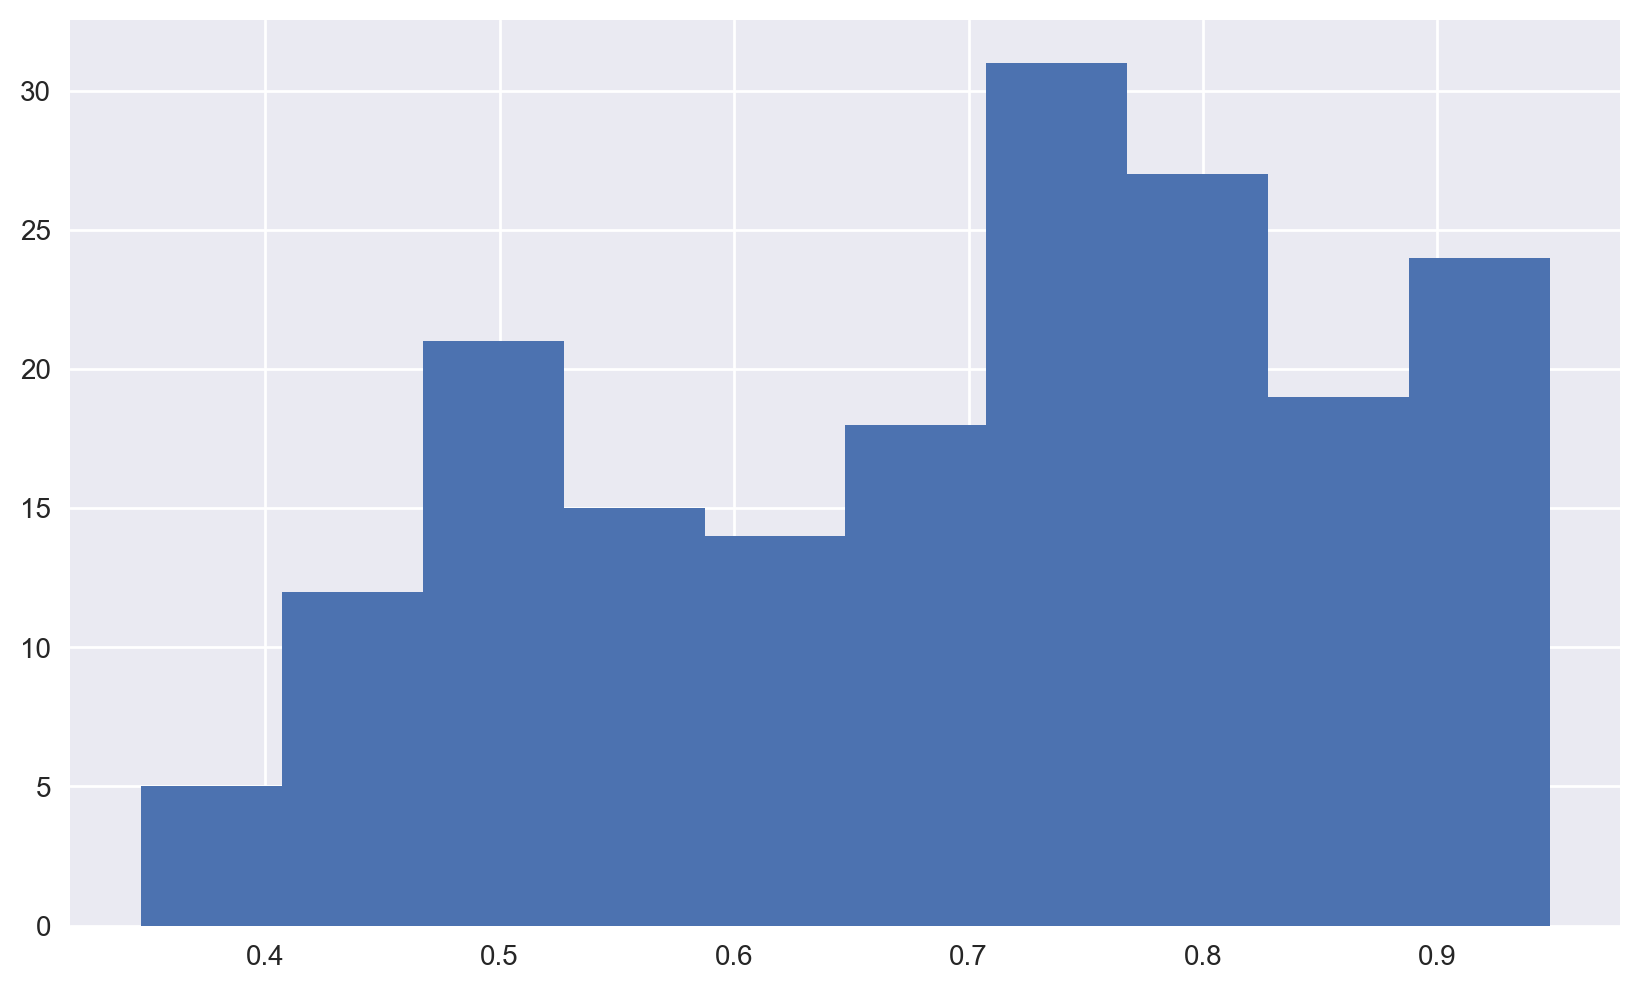

In [17]:
plt.hist(df['undp_hdi'].dropna())

Text(0.5, 1.0, 'Distribución del Indice de Desarrollo Humano')

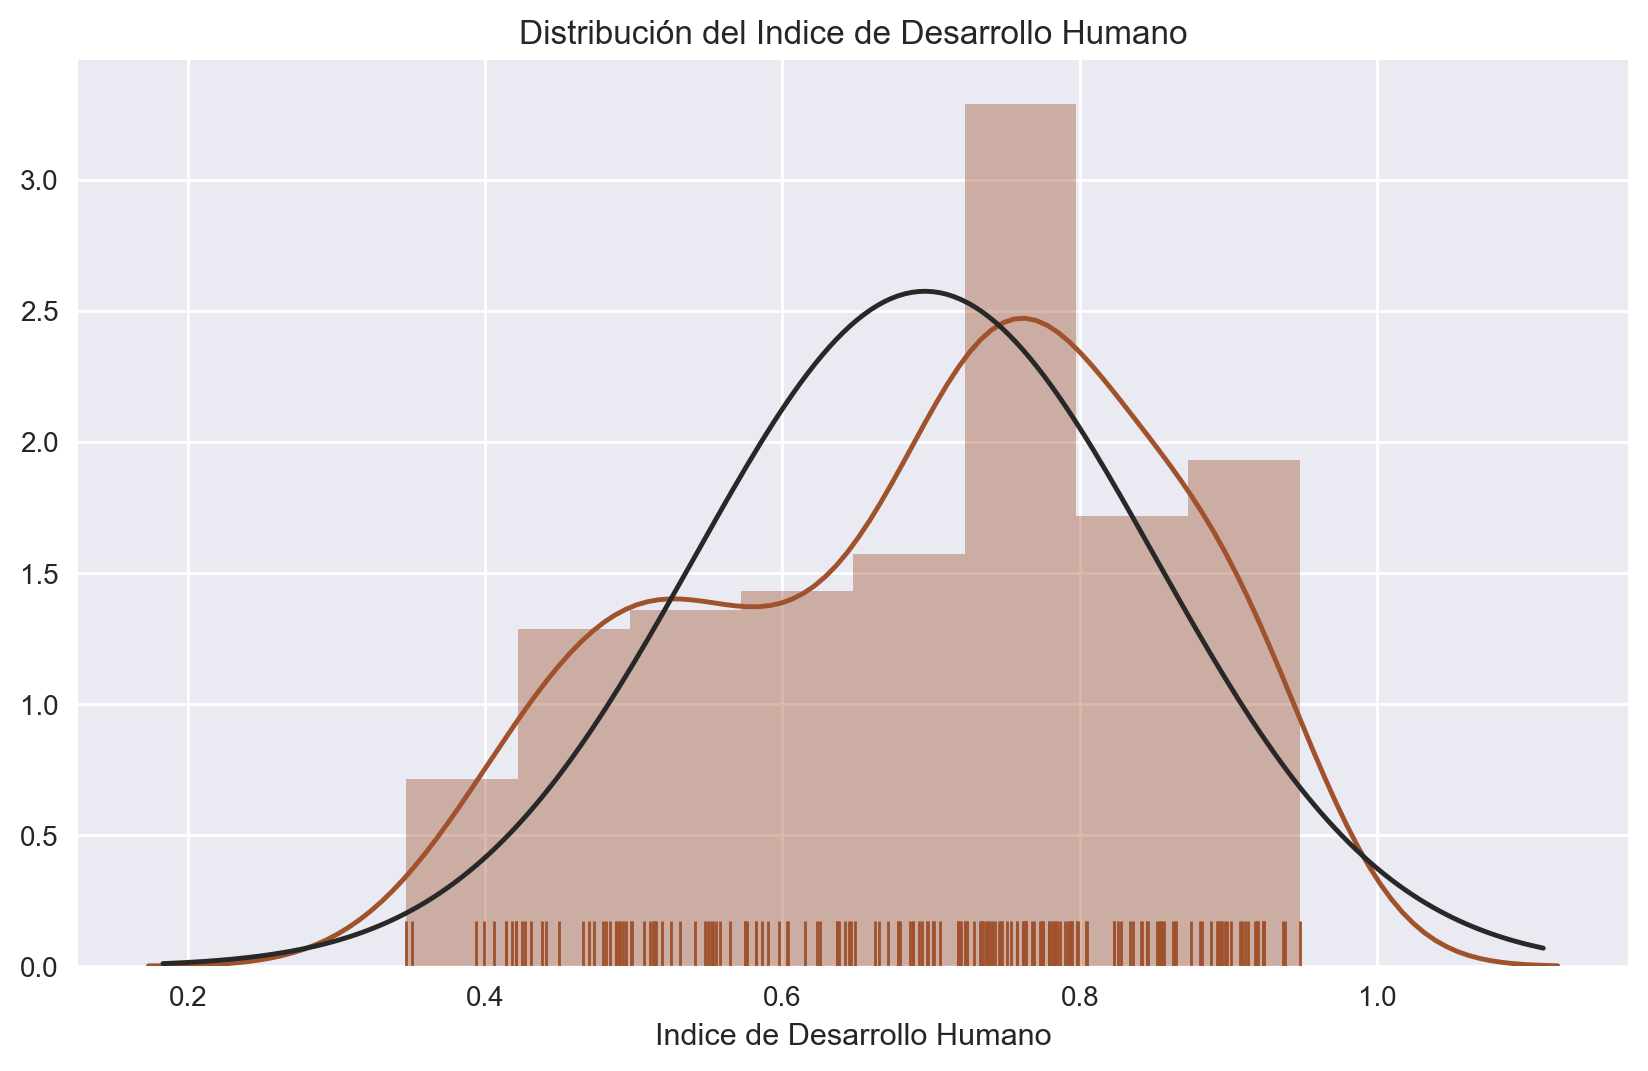

In [18]:
sns.distplot(df['undp_hdi'].dropna(), rug=True, axlabel="Indice de Desarrollo Humano", 
             fit=stats.norm, color='sienna').set_title('Distribución del Indice de Desarrollo Humano')

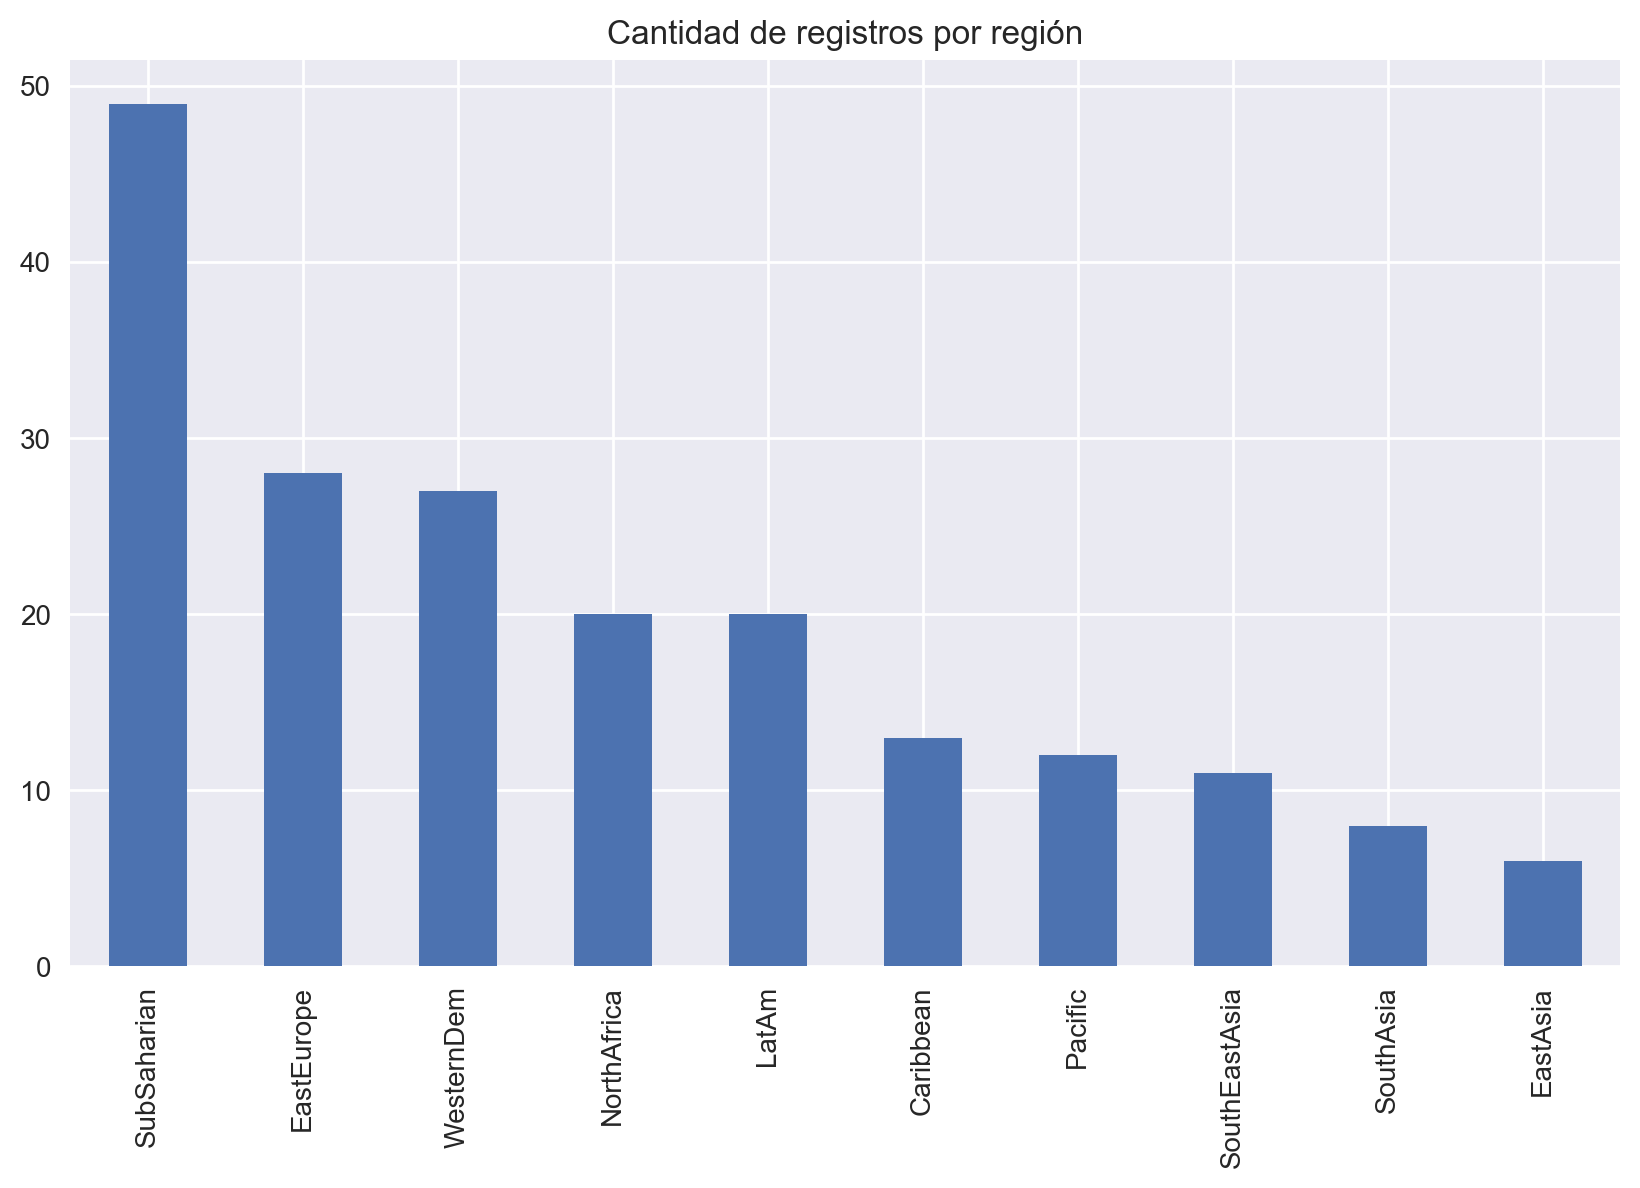

In [22]:
# generemos una variable para agregar los nombres asociados a cada número
df['region_recod'] = df['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                             ['EastEurope', 'LatAm', 'NorthAfrica', 
                                              'SubSaharian', 'WesternDem', 'EastAsia',
                                              'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])
# gráficamos en barras el resultado de value_counts.
df['region_recod'].value_counts().plot(kind='bar').set_title('Cantidad de registros por región');

Text(0.5, 1.0, 'Cantidad de registros por región')

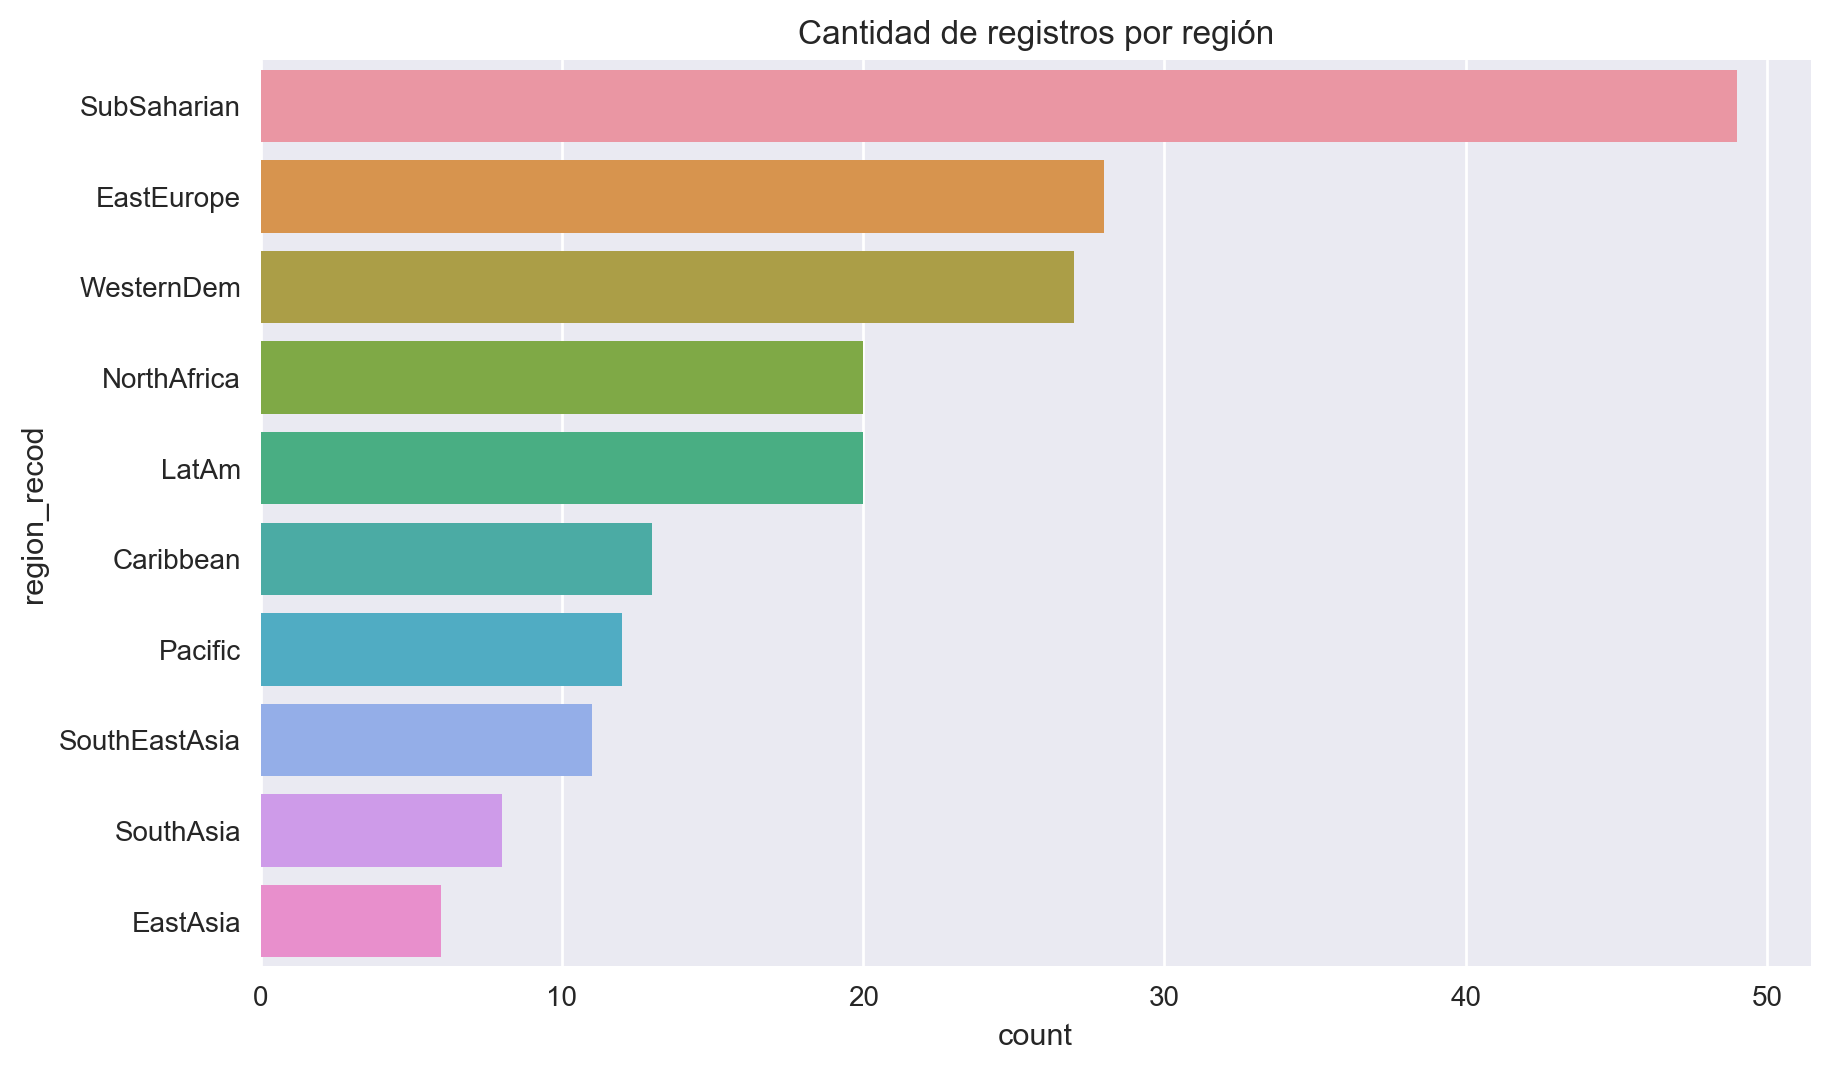

In [20]:
sns.countplot(y= df['region_recod'], order = df['region_recod'].value_counts().index).set_title('Cantidad de registros por región')

Text(0.5, 1.0, 'Cantidad de gobiernos en cada región, según tipo de gobierno')

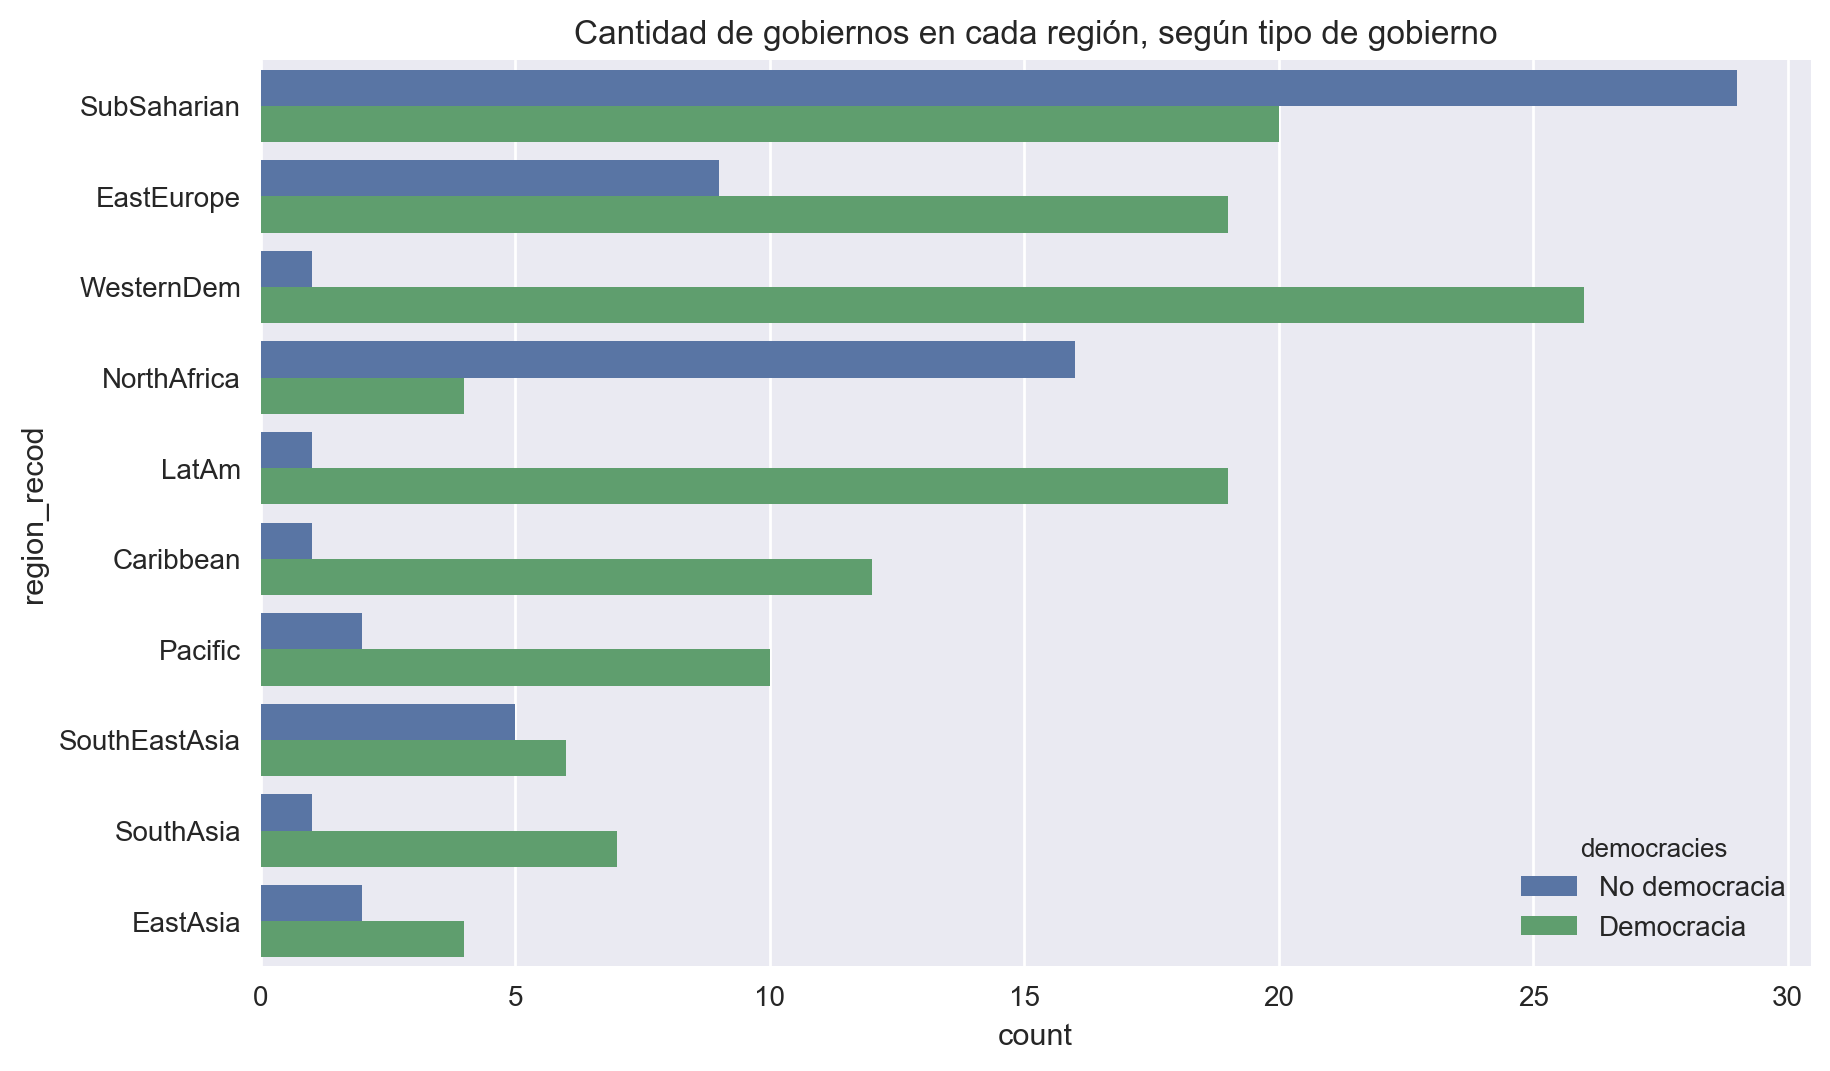

In [21]:
# generamos una recodificación binaria con np.where
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No democracia')
sns.countplot(y = df['region_recod'], hue=df['democracies'], order = df['region_recod'].value_counts().index).set_title('Cantidad de gobiernos en cada región, según tipo de gobierno')

Text(0.5, 1.0, 'Distribución del IDH por zona geográfica')

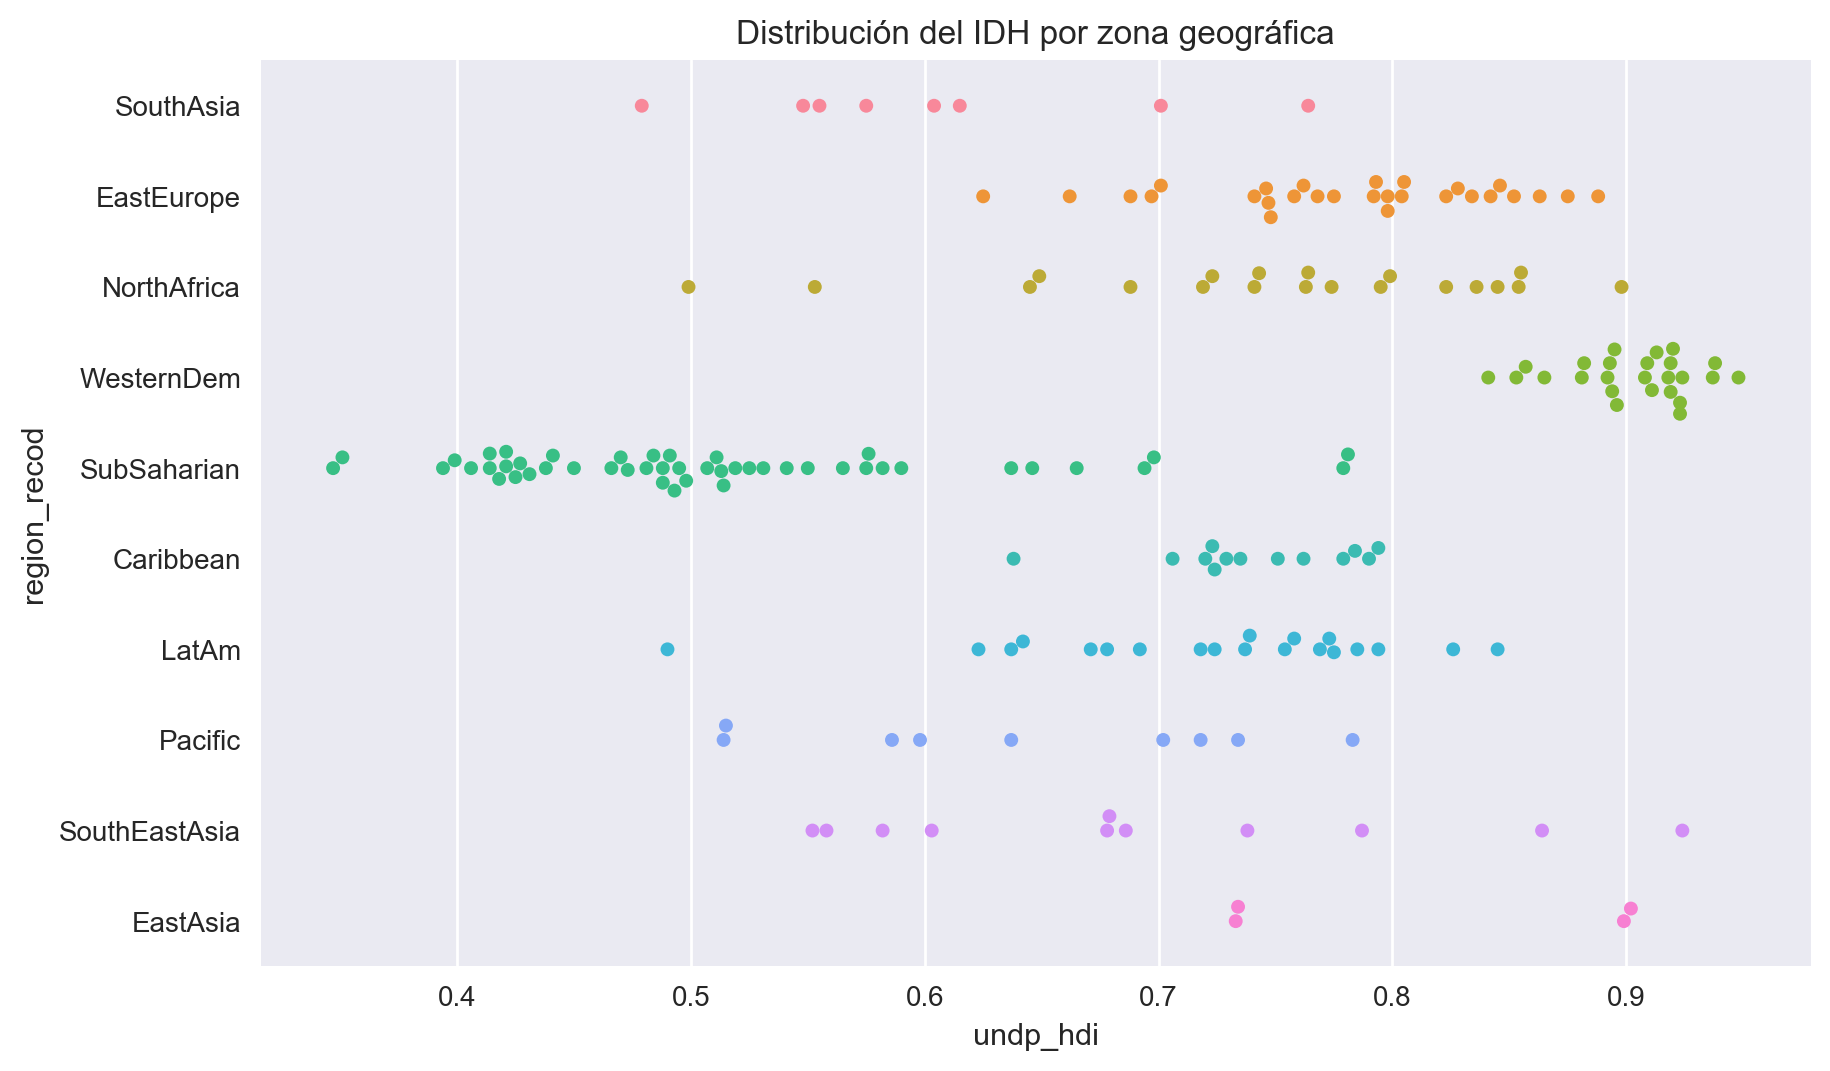

In [23]:
sns.swarmplot(y=df['region_recod'], x=df['undp_hdi']).set_title('Distribución del IDH por zona geográfica')

Text(0.5, 1.0, 'Distribución del IDH por región y tipo de gobierno')

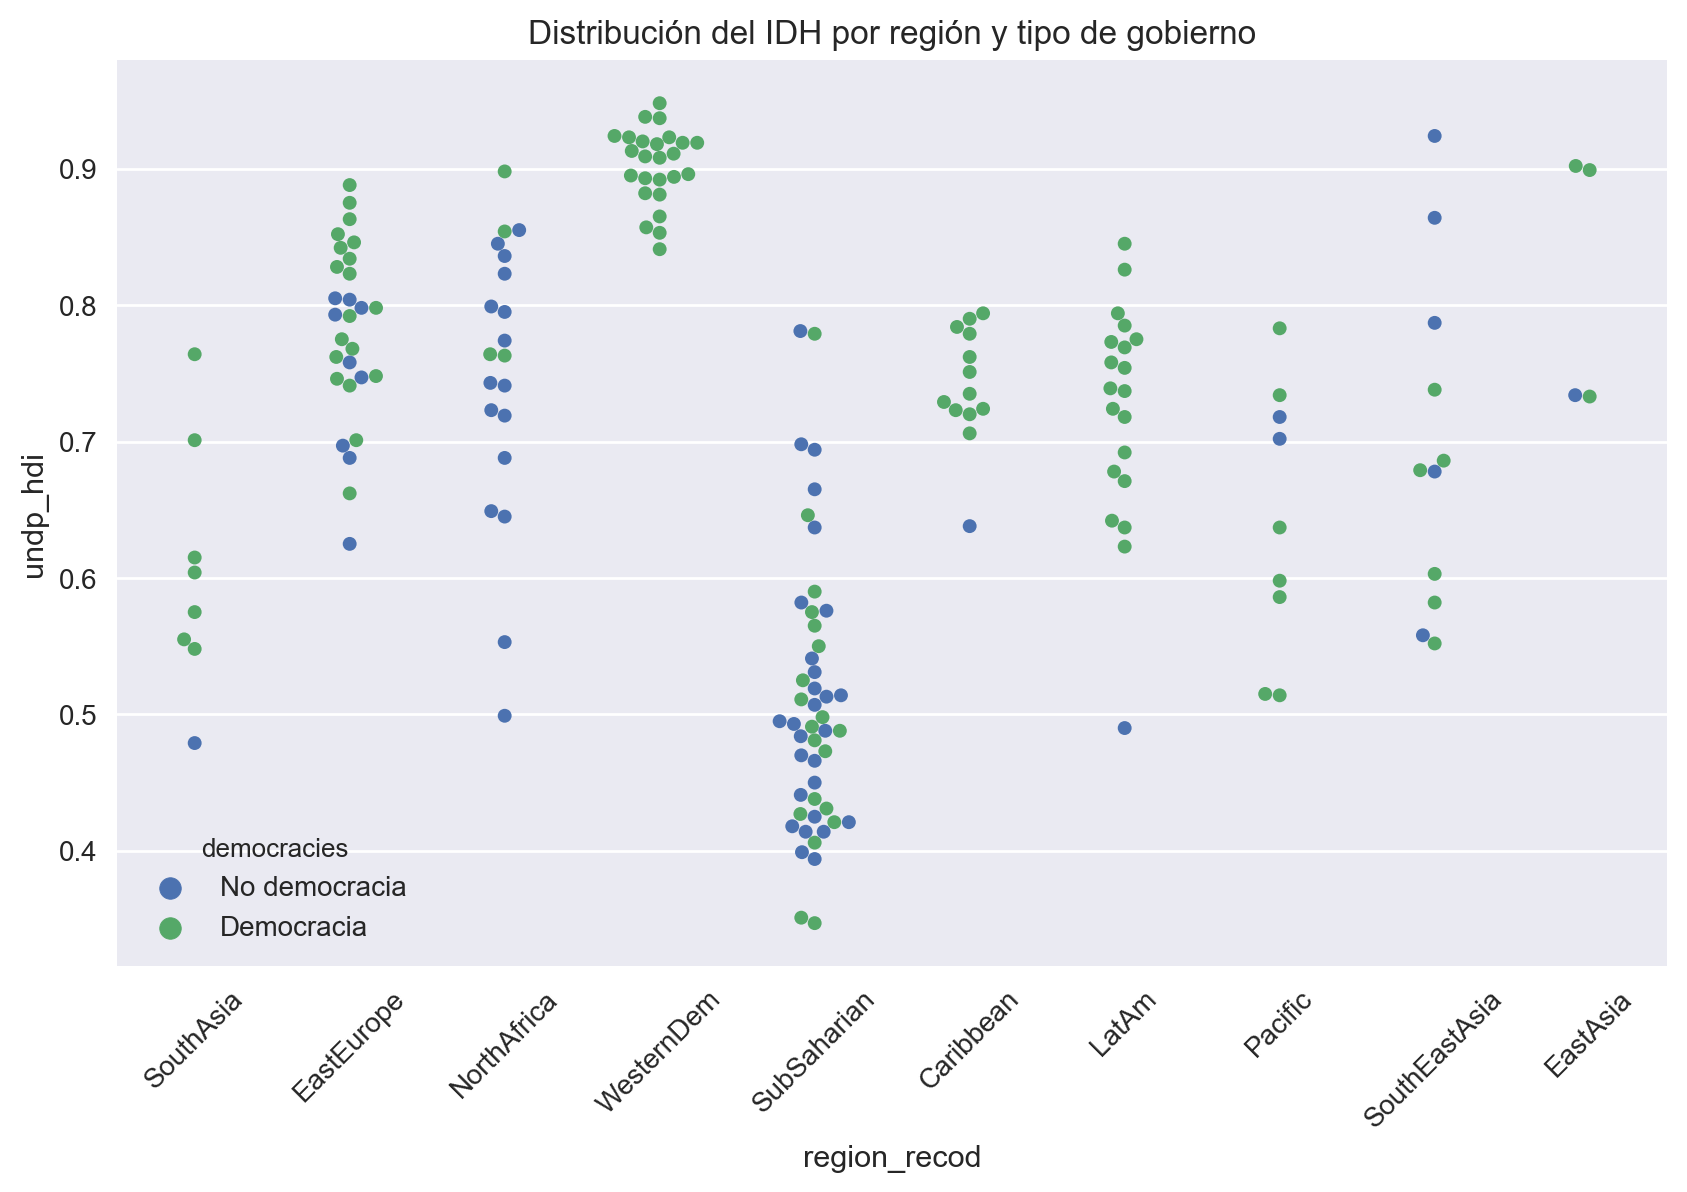

In [24]:
plt.xticks(rotation = 45)
sns.swarmplot(x=df['region_recod'], y=df['undp_hdi'], hue = df['democracies']).set_title('Distribución del IDH por región y tipo de gobierno')

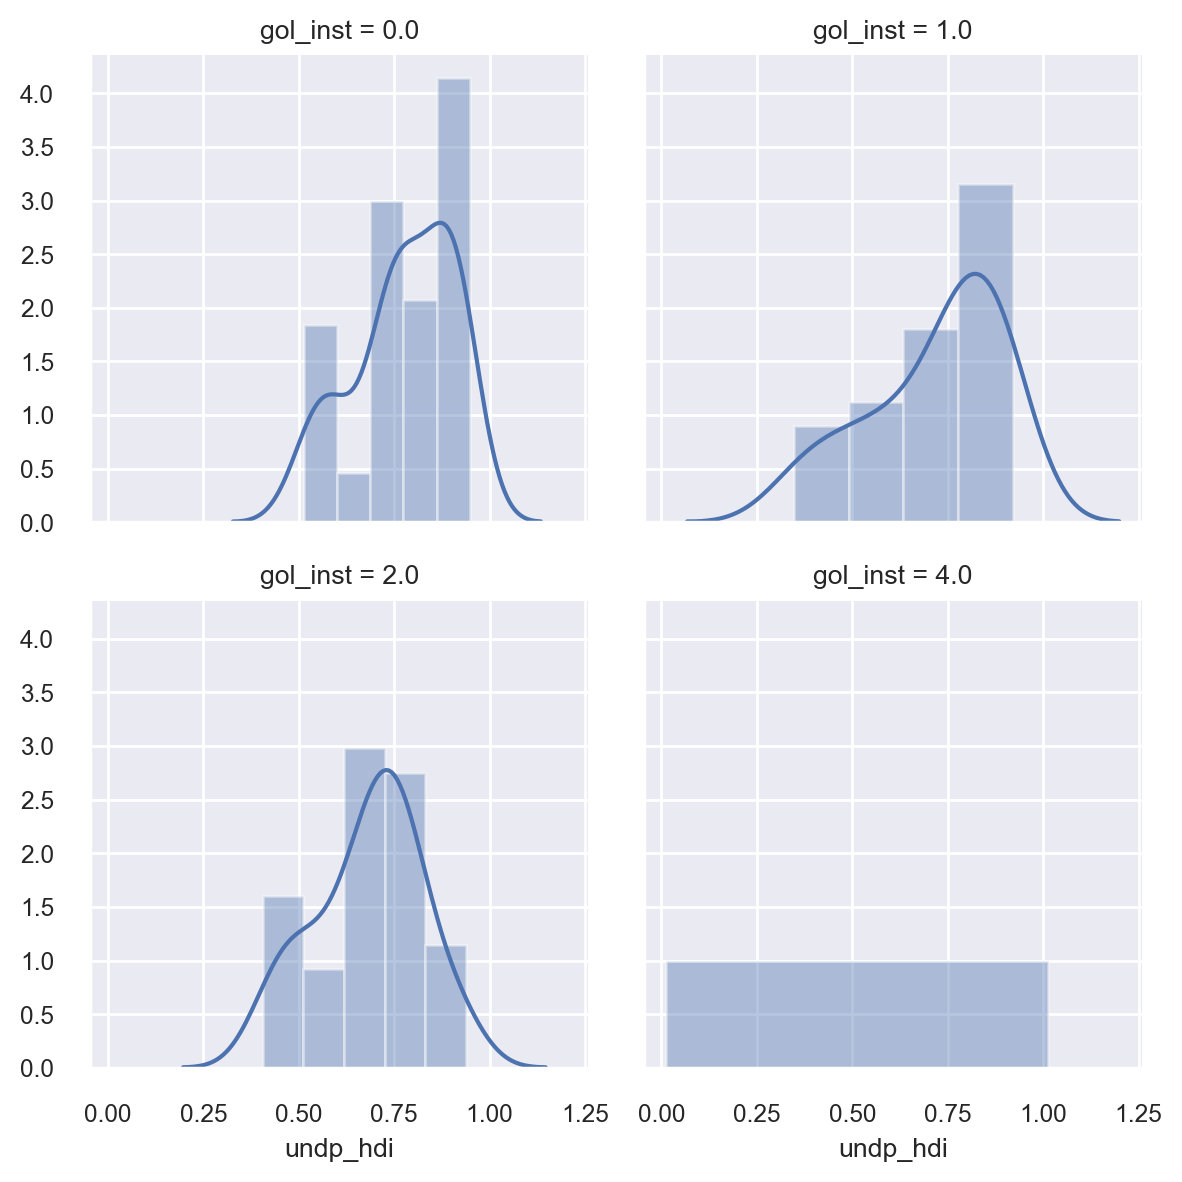

In [27]:
sns.set(font_scale=0.8) # Escalamiento de los titulos para que no sean tan grandes
grid = sns.FacetGrid(df, col="gol_inst", col_wrap=2)
axes = grid.axes.flatten() # Obtener los ejes de ploteo para poder darle titulo a cada grafico
axes[0].set_title('gol_inst = 0.0')
axes[1].set_title('gol_inst = 1.0')
axes[2].set_title('gol_inst = 2.0')
axes[3].set_title('gol_inst = 4.0')
grid = grid.map(sns.distplot, "undp_hdi")

Text(0, 0.5, 'Calidad del Gobierno')

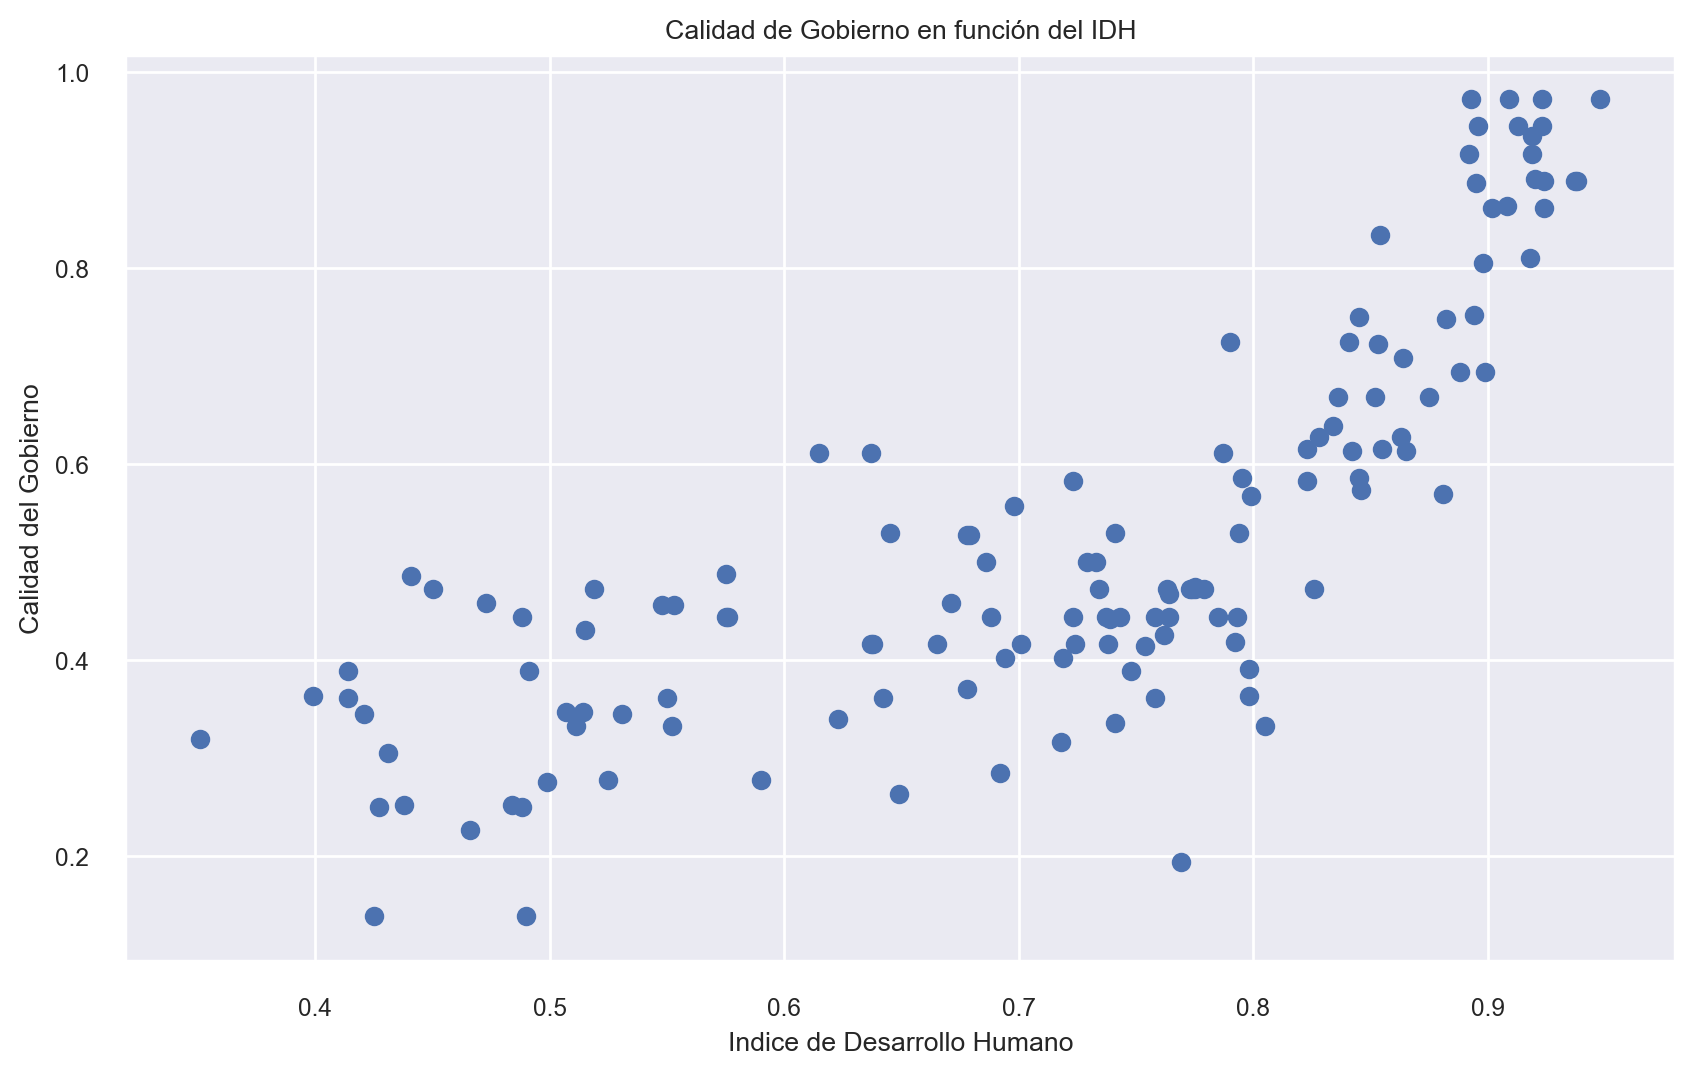

In [28]:
# generamos el gráfico
plt.scatter(x=df['undp_hdi'], y=df['icrg_qog'])
plt.title('Calidad de Gobierno en función del IDH')
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno")

In [29]:
# Separemos las columnas a trabajar y eliminemos los datos perdidos.
scatter_data = df.loc[:, ['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()
# calculamos los valores de la recta
pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'], scatter_data['icrg_qog'], 1)
# pidamos los valores
print("La pendiente es de: ", pendiente.round(3))
print("El intercepto es de: ", intercepto.round(3))

La pendiente es de:  1.008
El intercepto es de:  -0.195


Text(0, 0.5, 'Calidad del Gobierno')

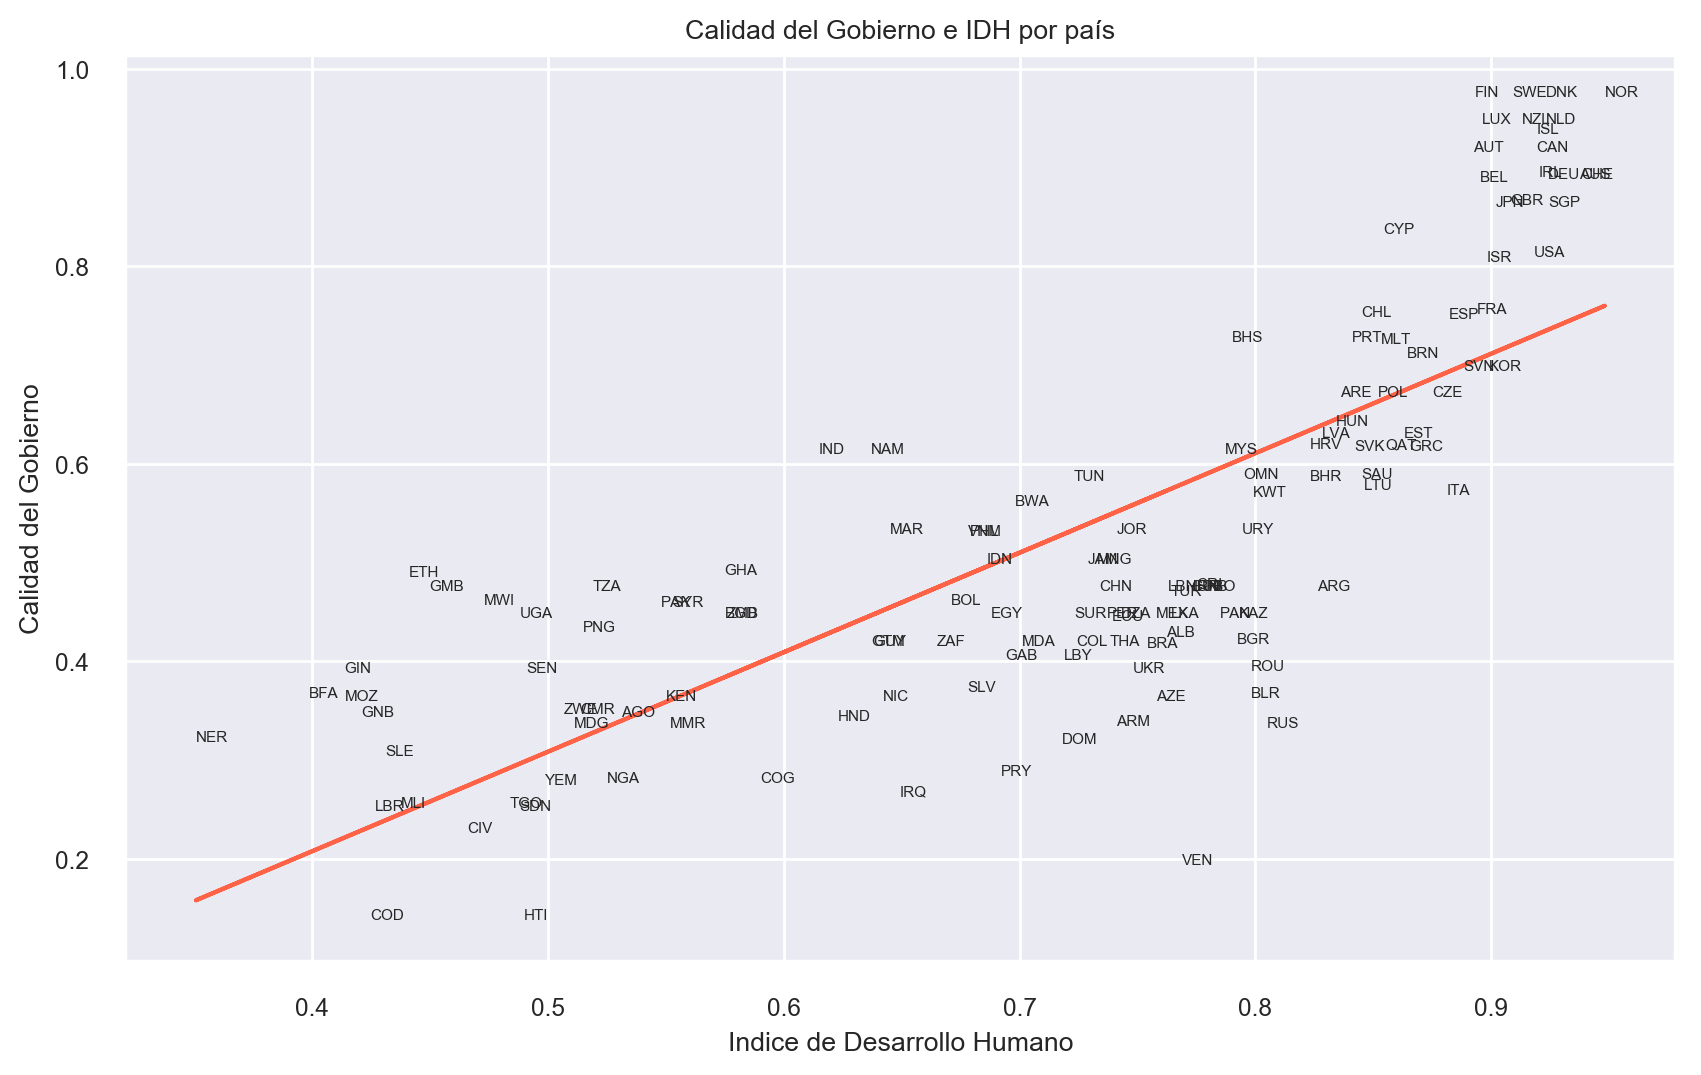

In [39]:
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker=",", s=.1)
ax.plot(scatter_data['undp_hdi'], [pendiente * j + intercepto for j in scatter_data['undp_hdi']], color='tomato')
for i in scatter_data.index:
    ax.text(scatter_data.loc[i, 'undp_hdi'], scatter_data.loc[i, 'icrg_qog'], str(scatter_data.loc[i, 'ccodealp']), fontsize = 5.5)
ax.set_title('Calidad del Gobierno e IDH por país')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno")

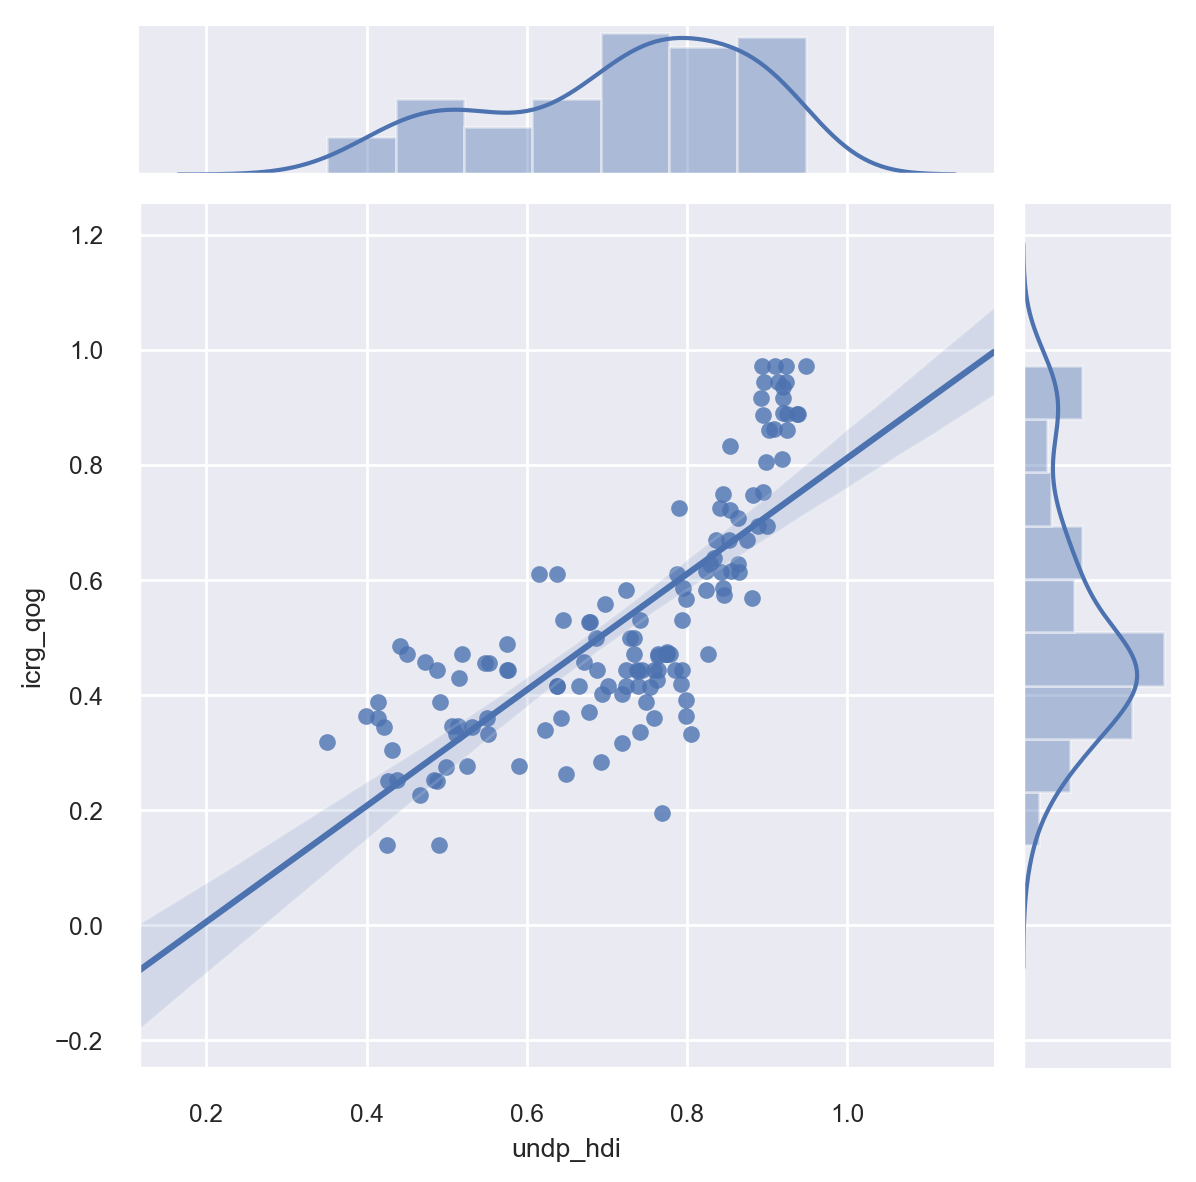

In [41]:
sns.jointplot(scatter_data['undp_hdi'], scatter_data['icrg_qog'], kind='reg')

In [42]:
scatter_data['undp_hdi'].corr(scatter_data['icrg_qog'])

0.7694078965882

In [43]:
wvs_subset = df.loc[: , 'wvs_auton':'wvs_trust']
wvs_subset['region'] = df['region_recod']
wvs_subset['country'] = df['cname']
wvs_subset = wvs_subset.dropna()

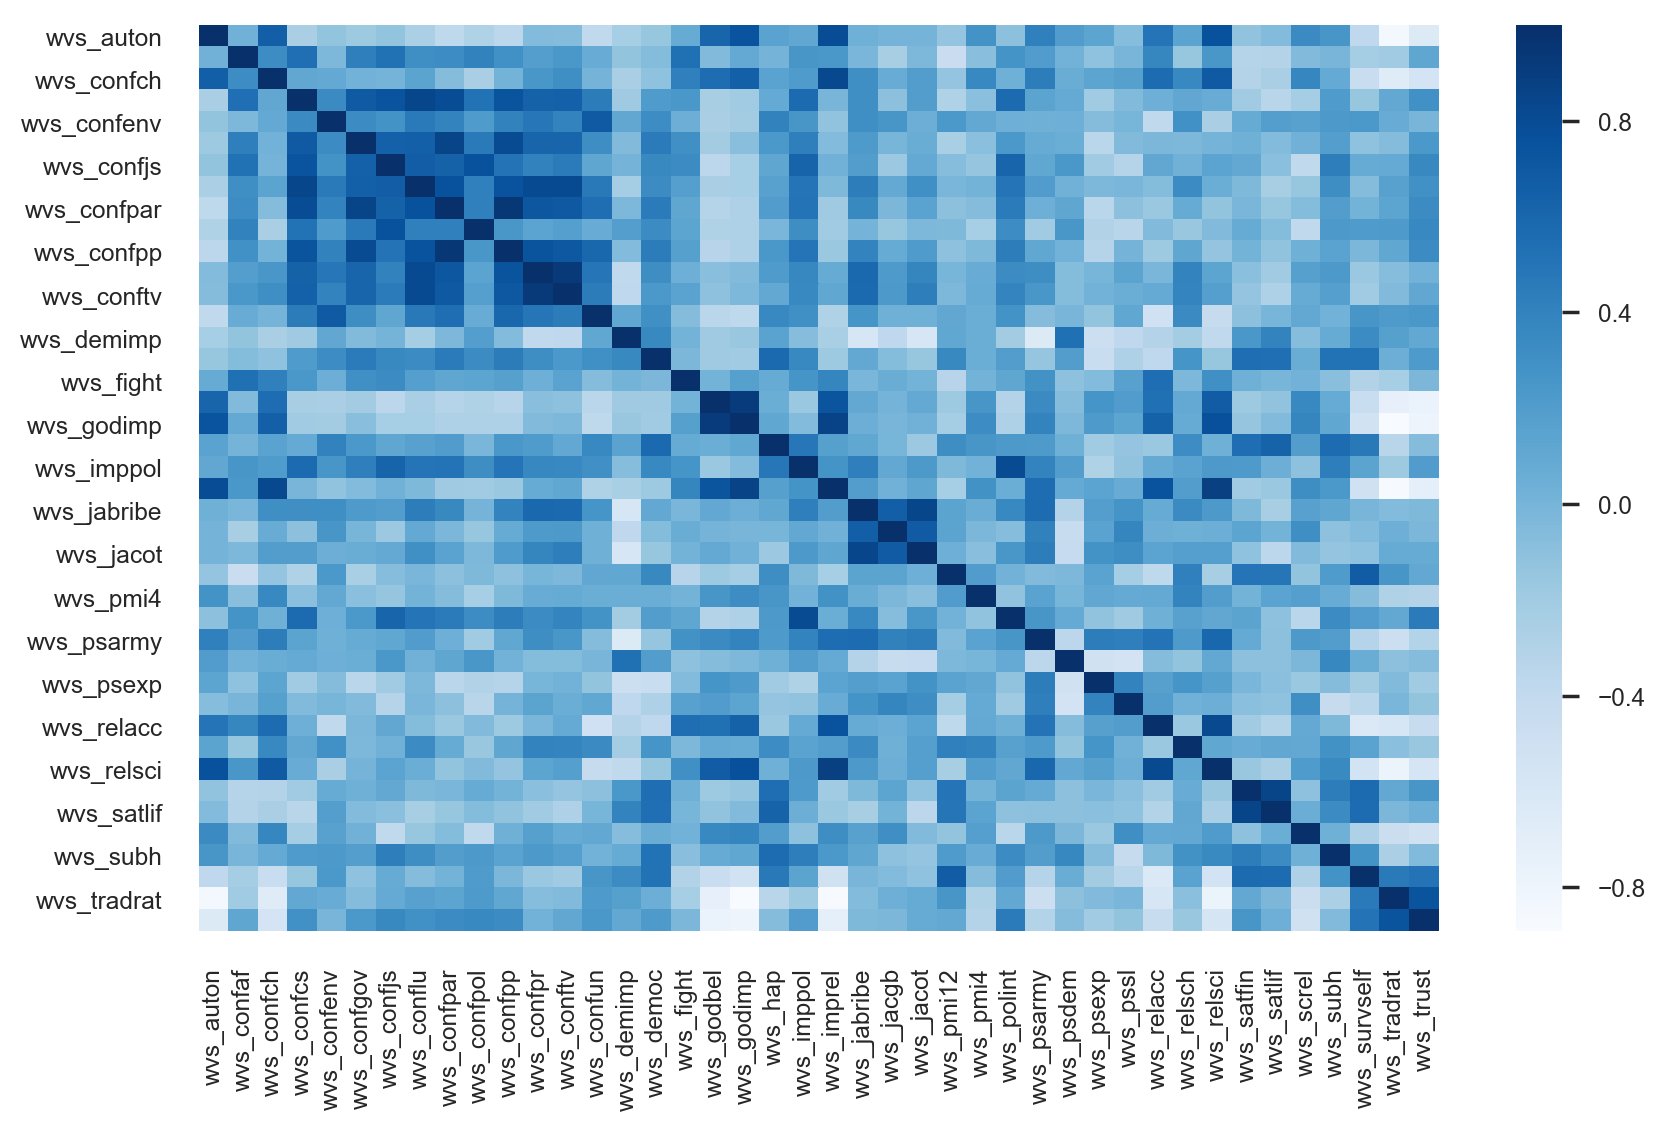

In [46]:
corr_mat = wvs_subset.corr()
sns.heatmap(corr_mat, cmap='Blues')

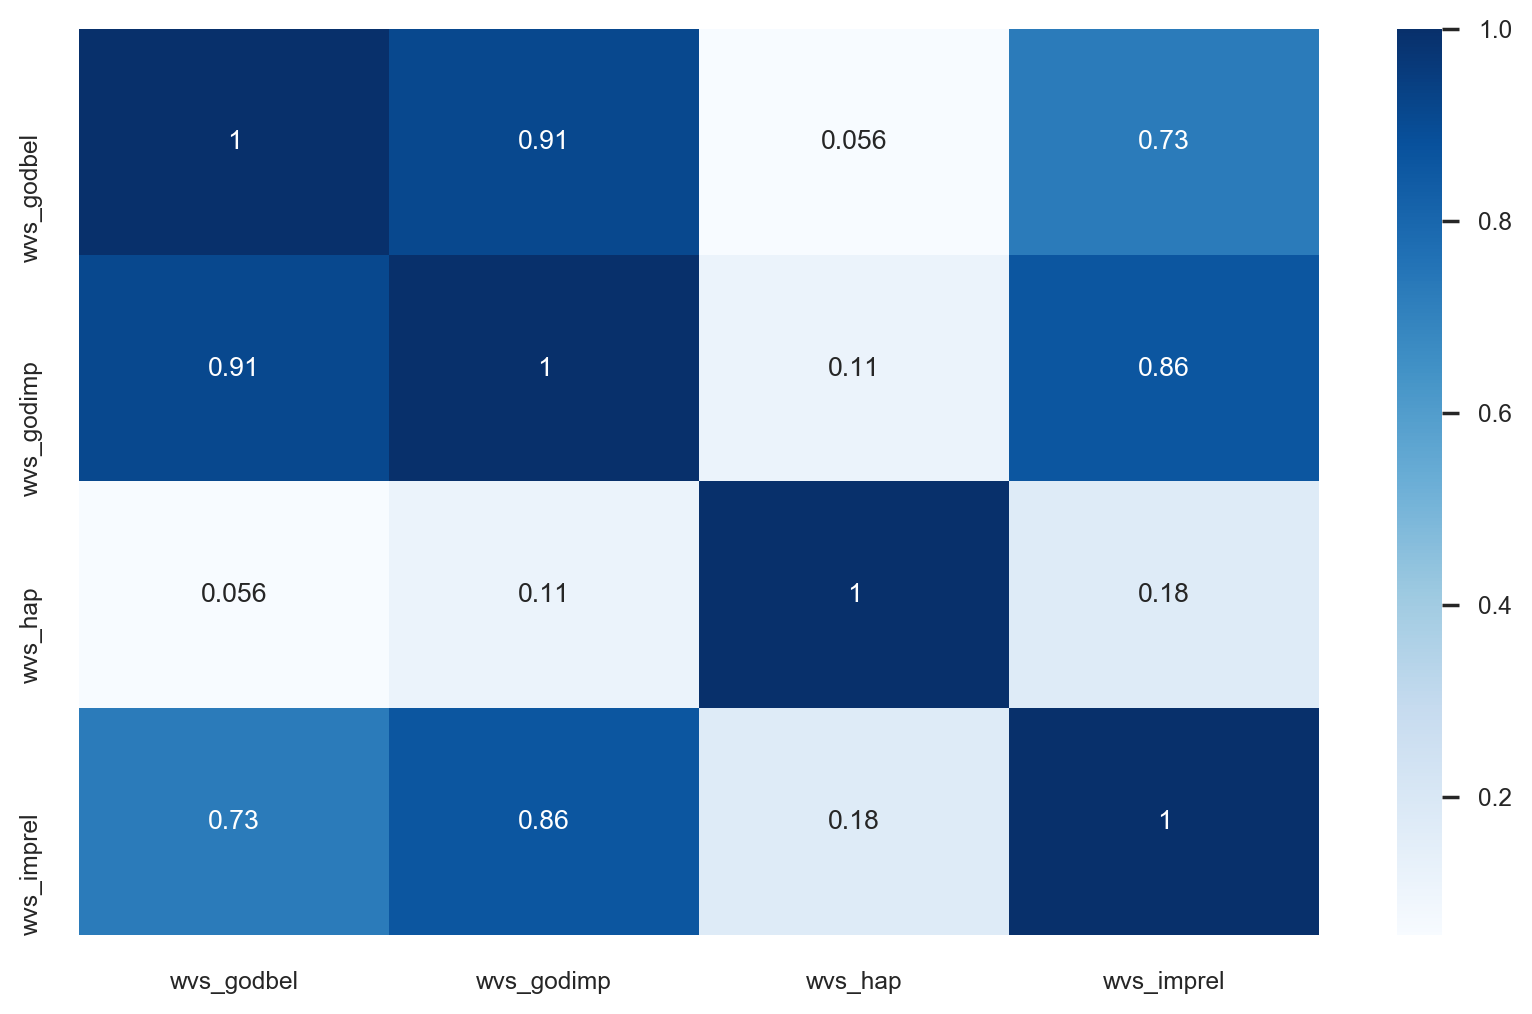

In [47]:
working_subset = wvs_subset.loc[:, ['wvs_godbel', 'wvs_godimp', 'wvs_hap', 'wvs_imprel']]
corr_mat = working_subset.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True)

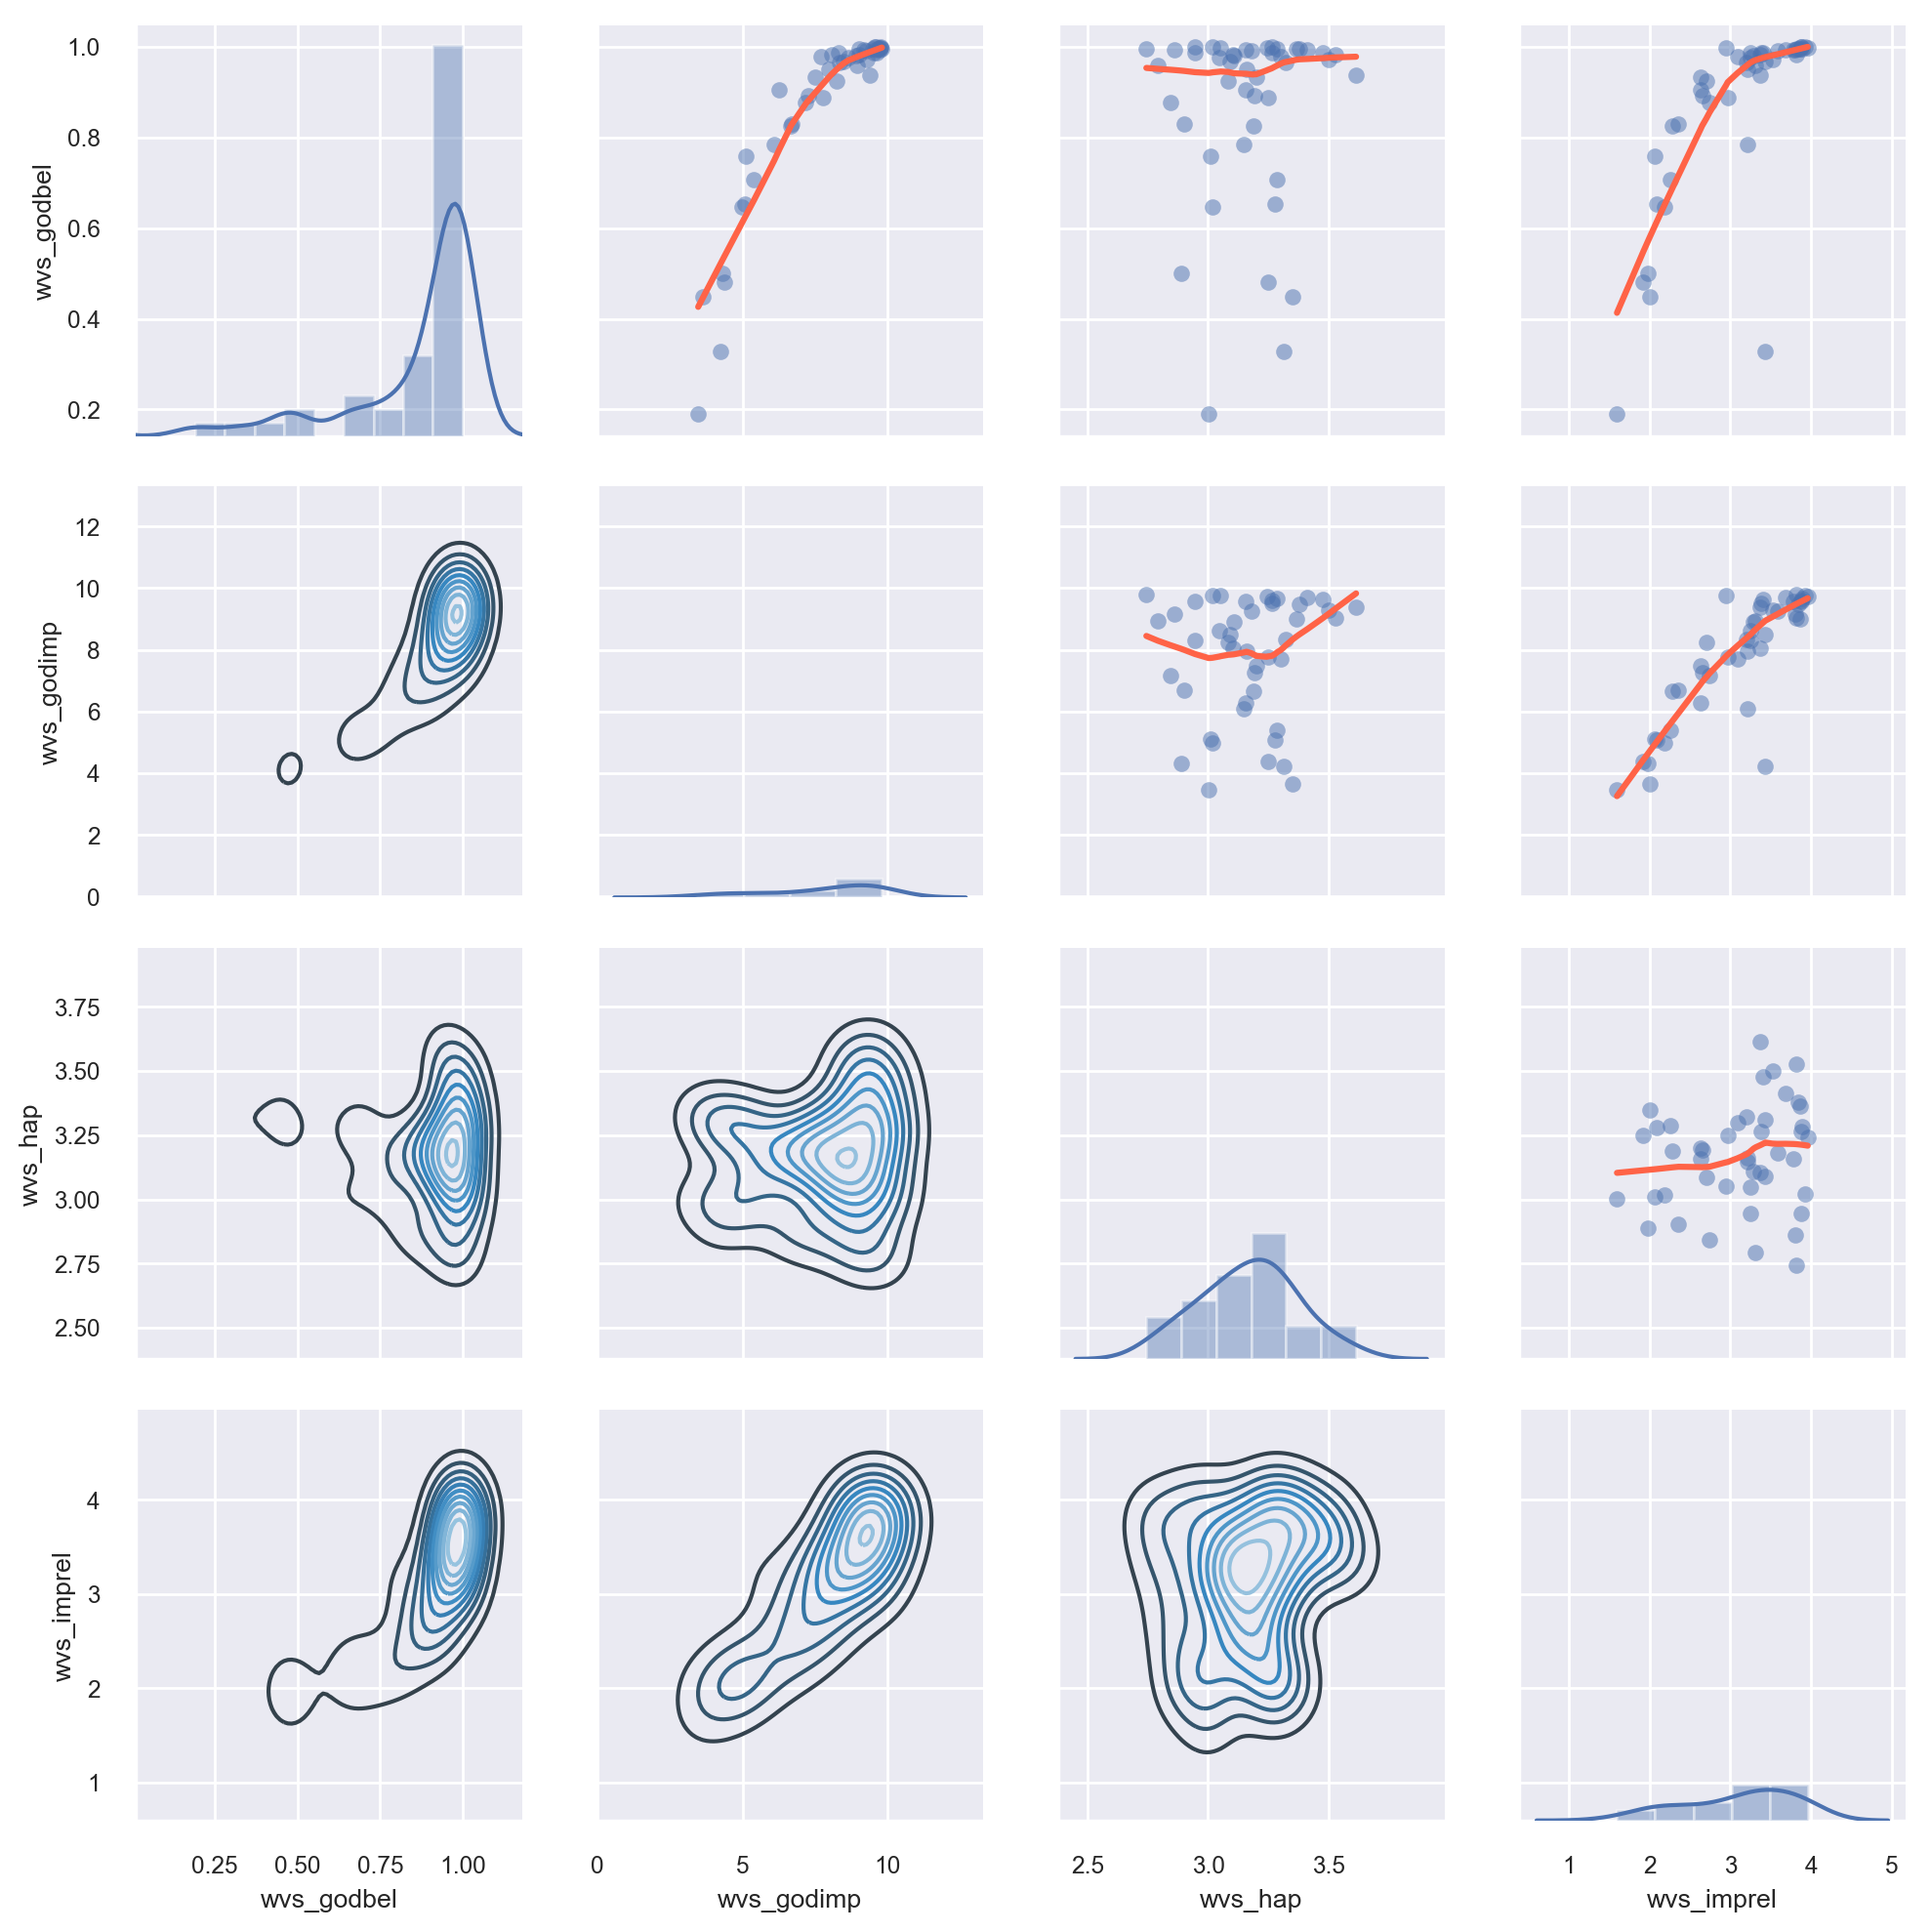

In [48]:
grid = sns.PairGrid(working_subset)
grid = grid.map_diag(sns.distplot)
grid = grid.map_lower(sns.kdeplot, cmap="Blues_d")
grid = grid.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':.5}, line_kws={'color': 'tomato'})

In [49]:
diff = np.mean(wvs_subset['wvs_trust']) - 0.7
std_err = np.sqrt(np.var(wvs_subset['wvs_trust'], ddof=1) / float(wvs_subset['wvs_trust'].shape[0]))
diff / std_err

-18.770596381293284

In [50]:
stats.ttest_1samp(wvs_subset['wvs_trust'], .7)

Ttest_1sampResult(statistic=-18.770596381293288, pvalue=1.2609756204715342e-22)

In [51]:
wvs_subset['western_dm'] = np.where(wvs_subset['region'] == 'WesternDem', 1, 0)

In [52]:
stats.ttest_ind(wvs_subset.query('western_dm == 1')['wvs_trust'], wvs_subset.query('western_dm == 0')['wvs_trust'])

Ttest_indResult(statistic=5.108950860705963, pvalue=7.079387187592779e-06)